#Projects in AI and ML HW4 Task 1

For this task, the image dataset I chose to use is the Fashion MNIST Dataset found on kaggle and taken from a github repository linked in the kaggle page: https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=fashion-mnist_train.csv

This dataset classifies images into categories of clothing.

First, I need to get the data, and the easiest way to do this is to clone the repository and take it directly from the repository rather than downloading the data and storing it on my machine.

In [2]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 762, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 762 (delta 0), reused 2 (delta 0), pack-reused 758 (from 1)
Receiving objects: 100% (762/762), 105.85 MiB | 15.25 MiB/s, done.
Resolving deltas: 100% (444/444), done.


This dataset is already split into testing and training.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
import random
import umap
import sys
from utils import mnist_reader
warnings.filterwarnings("ignore")

In [4]:
import sys
sys.path.append("/content/fashion-mnist")
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

The data for this dataset is preprepared and cleaned for machine learning applications, so no work needs to be done to preprocess it. I will start by visualizing the data.


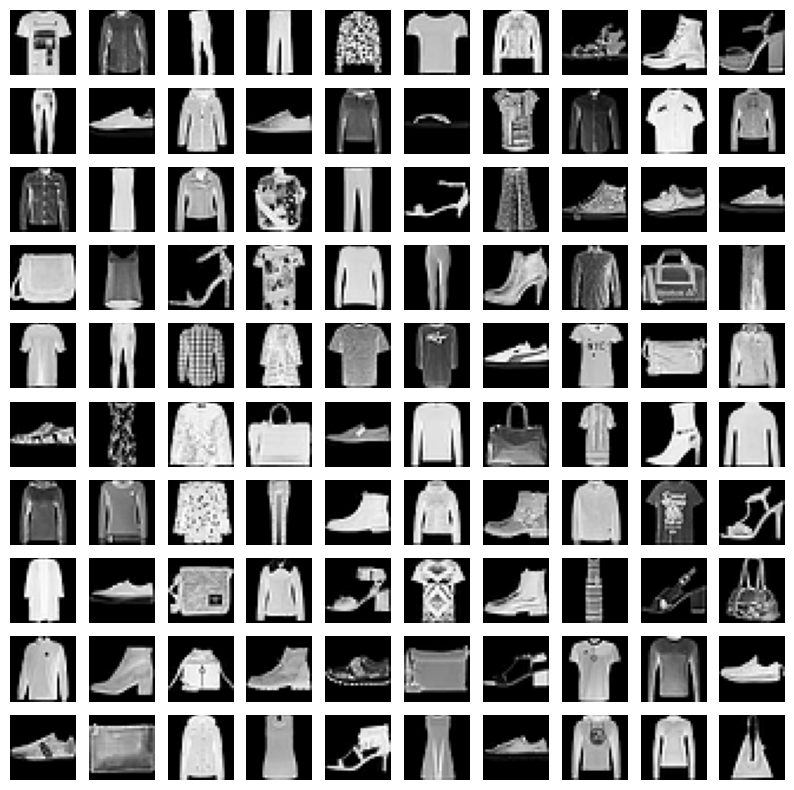

In [5]:
# Show a random sample of the images

random_indices = random.sample(range(X_train.shape[0]), 100)

plt.figure(figsize=(10, 10))

for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
    plt.axis("off")

plt.show()


In [6]:
unique_labels, counts = np.unique(y_train,return_counts=True)
class_distribution = dict(zip(unique_labels,counts))
print("Class distribution: \n", class_distribution)

Class distribution: 
 {np.uint8(0): np.int64(6000), np.uint8(1): np.int64(6000), np.uint8(2): np.int64(6000), np.uint8(3): np.int64(6000), np.uint8(4): np.int64(6000), np.uint8(5): np.int64(6000), np.uint8(6): np.int64(6000), np.uint8(7): np.int64(6000), np.uint8(8): np.int64(6000), np.uint8(9): np.int64(6000)}


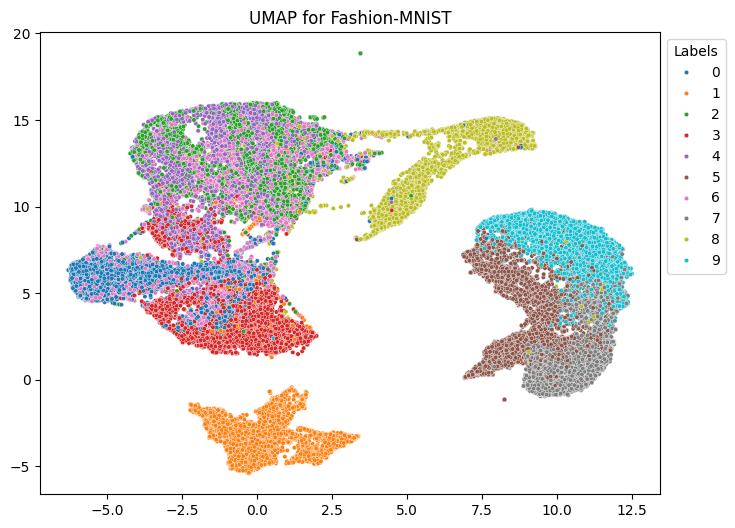

In [9]:
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=5, min_dist=0.1)
embedding = reducer.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y_train, palette="tab10", s=10)
plt.title("UMAP for Fashion-MNIST")
plt.legend(title="Labels", bbox_to_anchor=(1, 1))
plt.show()

In [10]:
labels = {
    0: "0 T-shirt/top",
    1: "1 Trouser",
    2: "2 Pullover",
    3: "3 Dress",
    4: "4 Coat",
    5: "5 Sandal",
    6: "6 Shirt",
    7: "7 Sneaker",
    8: "8 Bag",
    9: "9 Ankle boot"
}
mapped_labels = [labels[label] for label in y_train]

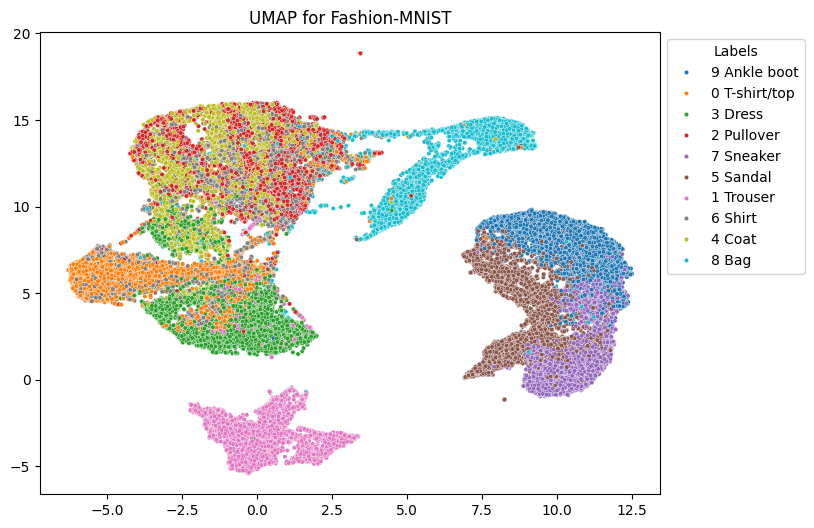

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=mapped_labels, palette="tab10", s=10)
plt.title("UMAP for Fashion-MNIST")
plt.legend(title="Labels", bbox_to_anchor=(1, 1))
plt.show()

From the plots above, it can be seen that similar items are grouped together. All of the shoe-like items are grouped, and trousers are separated from the rest as there is nothing similar to them. This could give an indication of which classes could be misclassified.

In [13]:
# Reshape and normalize the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Create the convolutional base
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# You can also calculate other metrics like F1-score
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1-score:', f1)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 66s 79ms/step - accuracy: 0.6886 - loss: 0.8508 - val_accuracy: 0.8432 - val_loss: 0.4305
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 70s 64ms/step - accuracy: 0.8555 - loss: 0.3948 - val_accuracy: 0.8740 - val_loss: 0.3509
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 60ms/step - accuracy: 0.8829 - loss: 0.3244 - val_accuracy: 0.8806 - val_loss: 0.3261
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.8949 - loss: 0.2857 - val_accuracy: 0.8798 - val_loss: 0.3281
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 62ms/step - accuracy: 0.9051 - loss: 0.2639 - val_accuracy: 0.9035 - val_loss: 0.2728
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.9110 - loss: 0.2430 - val_accuracy: 0.9068 - val_loss: 0.2646
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 58ms/step - accuracy: 0.9209 - loss: 0.2158 - val_accuracy: 0.9006 - val_loss: 0.2710
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 62ms/step - accuracy: 0.9249 - loss: 0.2060 - 

I used a pattern with three convolutional layers followed by max-pooling layers, then a flatten layer, a dense layer, and a final output layer. The convolution layers are used to reduce the dimensionality of the feature maps. The flatten layer is used to convert the multi-dimensional feature maps into a one-dimensional vector. The dense layer performs classification based on the extracted features. the final output layer is a softmax layer that provides the probability of each class. I used accuracy and f1 score as evaluation metrics. This model performs well with accuracy and f1 scores of 0.9.

# Part 2

In [14]:
# Choose MobileNetV2 for transfer learning
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(32, 32, 3),  # Input shape needs to be adjusted
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base model initially

# Create a new model on top of the base model
model = keras.Sequential([
    keras.layers.Lambda(lambda image: tf.image.grayscale_to_rgb(image)),  # Convert to RGB
    keras.layers.Resizing(32, 32),
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Calculate F1-score
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1-score:', f1)



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 94s 117ms/step - accuracy: 0.4229 - loss: 1.8578 - val_accuracy: 0.5925 - val_loss: 1.3485
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.5941 - loss: 1.2913 - val_accuracy: 0.6103 - val_loss: 1.2017
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 70ms/step - accuracy: 0.6099 - loss: 1.1721 - val_accuracy: 0.6144 - val_loss: 1.1433
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.6173 - loss: 1.1172 - val_accuracy: 0.6178 - val_loss: 1.1138
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.6231 - loss: 1.0900 - val_accuracy: 0.6205 - val_loss: 1.0962
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 69ms/step - accuracy: 0.6192 - loss: 1.0801 - val_accuracy: 0.6235 - val_loss: 1.0851
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 70ms/step - accuracy: 0.6295 - loss: 1.0537 - val_accuracy: 0.6240 - val_loss: 1.0766
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 

I used the MobileNetV2 model, which could have potential for improved accuracy. It is trained on ImageNet, so it has learned features that could be beneficial for image classification. However, since the fashion MNIST data is fairly simple in complexity and different from ImageNet dataset, the accuracy and f1 score for this model was around 0.62, which is much lower than that of the previous model.

#Part 3

In [15]:
# Data augmentation using image rotation
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,  # Rotate images by up to 20 degrees
    # You can add other transformations like horizontal_flip, width_shift_range, etc.
)

# Fit the generator to training data
image_generator.fit(X_train)

# Create a new model
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with augmented data
val_size = int(0.2 * X_train.shape[0])
model.fit(image_generator.flow(X_train[:-val_size], y_train[:-val_size], batch_size=64),
                    epochs=10,
                    validation_data=image_generator.flow(X_train[-val_size:], y_train[-val_size:], batch_size=64))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Calculate F1-score
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1-score:', f1)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.6552 - loss: 0.9395 - val_accuracy: 0.8118 - val_loss: 0.5127
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 77ms/step - accuracy: 0.8269 - loss: 0.4751 - val_accuracy: 0.8393 - val_loss: 0.4216
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.8518 - loss: 0.4027 - val_accuracy: 0.8563 - val_loss: 0.3856
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 86ms/step - accuracy: 0.8659 - loss: 0.3672 - val_accuracy: 0.8658 - val_loss: 0.3685
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 79ms/step - accuracy: 0.8721 - loss: 0.3435 - val_accuracy: 0.8778 - val_loss: 0.3389
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 81ms/step - accuracy: 0.8806 - loss: 0.3203 - val_accuracy: 0.8767 - val_loss: 0.3361
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 78ms/step - accuracy: 0.8885 - loss: 0.3021 - val_accuracy: 0.8771 - val_loss: 0.3419
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.8935 - loss: 0.2927 - 

This model could have potentially had improved generalization as data augmentation can help the model learn features that are more robust to variations in the input data, which can lead to better generatlization on unseen data, increasing the accuracy and f1 score. However, due to the nature of the Fashion MNIST dataset, this actually did not result in better scores since these images are not very complex. The accuracy and f1 scores were around 0.88, which is slightly lower than the first model but still significantly better than the second model.
